In [2]:
# rewrite the mlp code before
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# generate the data 
words = open('name.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))  # unique characters
stoi = {s: i for i, s in enumerate(chars)}  # string to index
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}  # index to string

# hyperparameters
block_size = 5 # context length
input_layer_dim = 10 # compressed dimension of the character embedding
hidden_layer_dim = 200 # hidden layer neurons
train_split = 0.8 * len(words) # split the dataset into train, dev, and test sets
dev_split = 0.9 * len(words)
learning_rate = 0.1 # learning rate for the optimizer
epochs = 30000 # number of epochs to train
batch_size = 32 # size of the mini-batch
g = torch.Generator().manual_seed(378439200393)  # random number generator for reproducibility

def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)  # set seed for reproducibility
random.shuffle(words)  # shuffle the words to ensure randomness
n1 = words[:int(train_split)]
n2 = words[int(train_split):int(dev_split)]
n3 = words[int(dev_split):]

Xtr, Ytr = build_dataset(n1)  # training set
Xdev, Ydev = build_dataset(n2)  # dev set
Xte, Yte = build_dataset(n3)  # test set

C = torch.randn((len(chars)+1, input_layer_dim), generator=g)  # character embedding matrix
W1 = torch.randn((input_layer_dim * block_size, hidden_layer_dim), generator=g)  # first layer weights
b1 = torch.randn((hidden_layer_dim,), generator=g)  # first layer bias
W2 = torch.randn((hidden_layer_dim, len(chars)+1), generator=g)  # second layer weights
b2 = torch.randn((len(chars)+1,), generator=g)  # second layer bias

parameters = [C, W1, b1, W2, b2]  # list of parameters
for p in parameters:
    p.requires_grad = True  # enable gradient computation


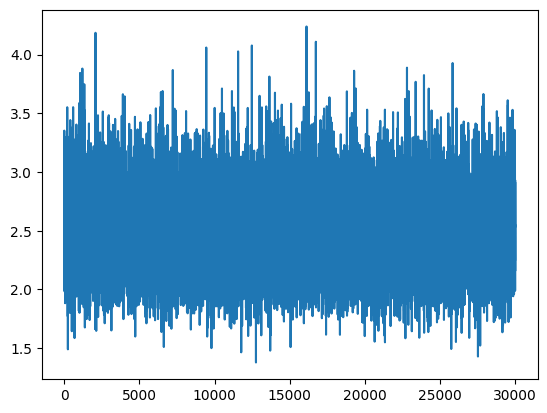

In [28]:
def training():
    # forward pass
    ix = torch.randint(0, len(Xtr), (batch_size,))
    emb = C[Xtr[ix]]  # get the character embeddings for the batch
    h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)  # first layer activation
    logits = h @ W2 + b2  # second layer output
    loss = F.cross_entropy(logits, Ytr[ix])  # compute the loss

    # backward pass
    for p in parameters:
        p.grad = None  # zero the gradients
    loss.backward()  # compute the gradients

    # update parameters
    for p in parameters:
        p.data += -learning_rate * p.grad
    
    return loss.item()  # return the loss value

stepi = []  # list to store the step number
lossi = []  # list to store the loss value
for i in range(epochs): 
    stepi.append(i)  # store the step number
    lossi.append(training())  # store the loss value

plt.plot(stepi, lossi)  # plot the loss value against the step number

In [29]:
print(lossi[-1])  # print the final loss value

2.5357937812805176


In [31]:
@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'dev': (Xdev, Ydev),
        'test': (Xte, Yte)
    }[split]

    emb = C[x]  # get the character embeddings for the split
    h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)  # first layer activation
    logits = h @ W2 + b2  # second layer output
    loss = F.cross_entropy(logits, y)
    return loss.item()  # return the loss value

print(f'train loss: {split_loss("train"):.4f}')  # print the training loss
print(f'dev loss: {split_loss("dev"):.4f}')  # print

train loss: 2.3815
dev loss: 2.4001


In [ ]:
g = torch.Generator().manual_seed(473783838)  # random number generator for reproducibility

for _ in range(20):
    out = []
    context = [0] * block_size  # initialize the context
    while True
        # shape may be 1 * block_size * input_layer_dim
        emb = C[torch.tensor(context)]  # get the character embeddings for the context
        # so the emb.view's first parameter is 1
        # from another perspective, we only have one input
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)  # first layer activation
        logits = h @ W2 + b2  # second layer output
        probs = F.softmax(logits, dim=1)  # compute the probabilities
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()  # sample from the probabilities
        out.append(itos[ix])  # append the character to the output
        context = context[1:] + [ix]  # update the context
        if ix == 0:  # stop if the end of the word is reached
            break
    print(''.join(out))  # print the generated word

torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
m.
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
sh.
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torch.Size([1, 200])
torch.Size([5, 10]) torch.Size([1, 50])
torch.Size([50, 200]) torch.Size([200])
torc